### Notebook to compare the outputs from the filtered truncated banks and the full banks in Run 2 data

---

In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f_filter = r.TFile("./data/filterTest/gm2offline_filtered.root")
f_full = r.TFile("./data/filterTest/gm2offline_fullIslands_2.root")
f_trunc = r.TFile("./data/filterTest/gm2offline_truncIslands.root")

Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSRawArtRecord is available


In [3]:
f_filter.cd("nearlineHistTree")
#f_filter.ls()

True

In [4]:
t_filter = f_filter.Get("nearlineHistTree").Get("eventTree")
t_filter.SetMarkerSize(0.5)
t_filter.SetMarkerColor(4)
t_filter.SetMarkerStyle(8)

t_full = f_full.Get("nearlineHistTree").Get("eventTree")
t_full.SetLineColor(2)
t_full.SetMarkerColor(2)
t_full.SetMarkerStyle(8)
t_full.SetMarkerSize(0.5)

t_trunc = f_trunc.Get("nearlineHistTree").Get("eventTree")
t_trunc.SetLineColor(3)
t_trunc.SetMarkerColor(3)
t_trunc.SetMarkerStyle(8)
t_trunc.SetMarkerSize(0.5)

In [5]:
ctag_filter = f_filter.Get("nearlineHistTree").Get("nearlineCTag").Clone()
ctag_full = f_full.Get("nearlineHistTree").Get("nearlineCTag").Clone()
ctag_full.SetLineColor(2)
ctag_trunc = f_trunc.Get("nearlineHistTree").Get("nearlineCTag").Clone()
ctag_trunc.SetLineColor(3)

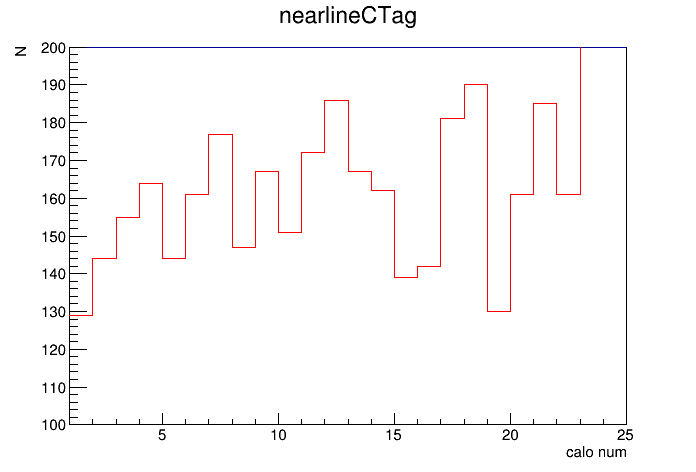

In [6]:
c = r.TCanvas()
ctag_filter.GetYaxis().SetRangeUser(100,200)
ctag_filter.Draw()
ctag_full.Draw("SAME")
ctag_trunc.Draw("SAME")
c.Draw()

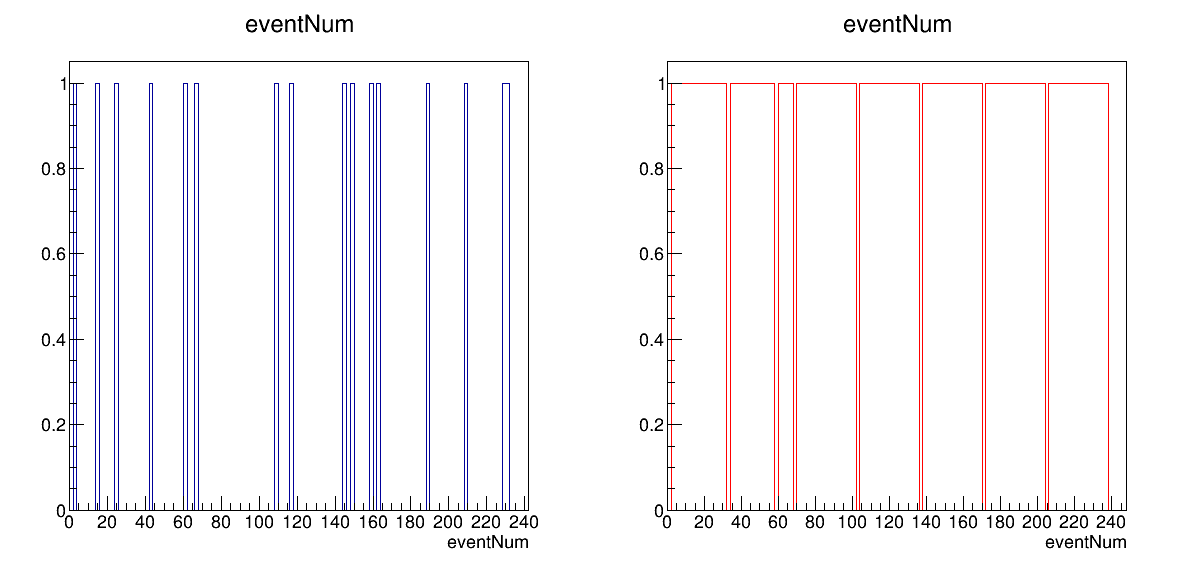

In [7]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)
c.cd(1)
t_filter.Draw("eventNum")
c.cd(2)
t_full.Draw("eventNum","","")
c.Draw()

66809 26108 454847
0.14688235824354123
0.05739952115766401
0.14285714285714285 0.1111111111111111 0.09090909090909091


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


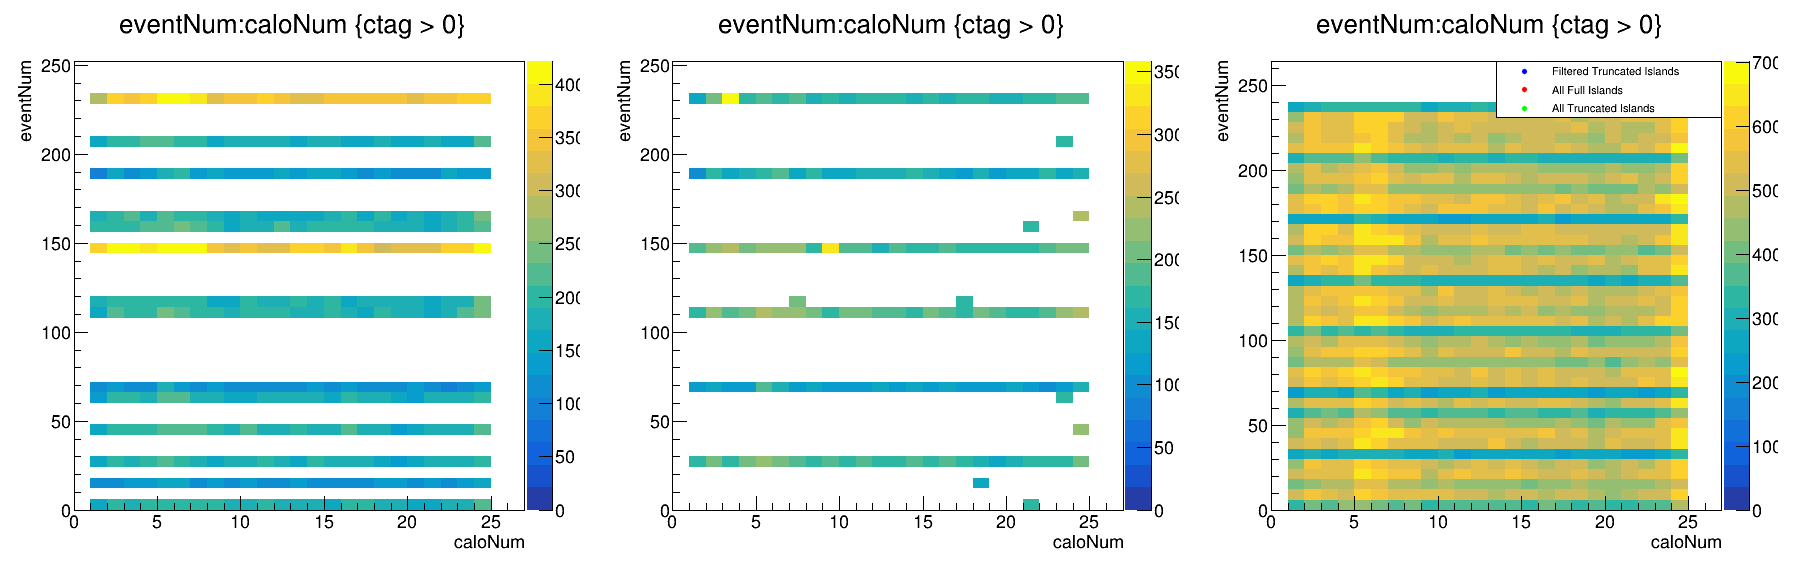

In [8]:
c = r.TCanvas("c","c",1800,600)
drawStr = "eventNum:caloNum"
filterStr = "ctag > 0"
fmtString = "colz"
#filterStr = ""
c.Divide(3)
c.cd(1)
n1 = t_filter.Draw(drawStr,filterStr,fmtString)
c.cd(2)
n2 = t_full.Draw(drawStr,filterStr,fmtString)
c.cd(3)
n3 = t_trunc.Draw(drawStr,filterStr,fmtString)

leg = r.TLegend(0.5,0.8,0.9,0.9)
leg.AddEntry(t_filter,"Filtered Truncated Islands","p")
leg.AddEntry(t_full,"All Full Islands","p")
leg.AddEntry(t_trunc,"All Truncated Islands","p")
leg.Draw()

c.Draw()

print(n1, n2, n3)
if(n3 > 0):
    print(n1/n3)
    print(n2/n3)
print(1/7.,1/9.,1/11.)

0 1967 0
0.14285714285714285 0.1111111111111111 0.09090909090909091


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


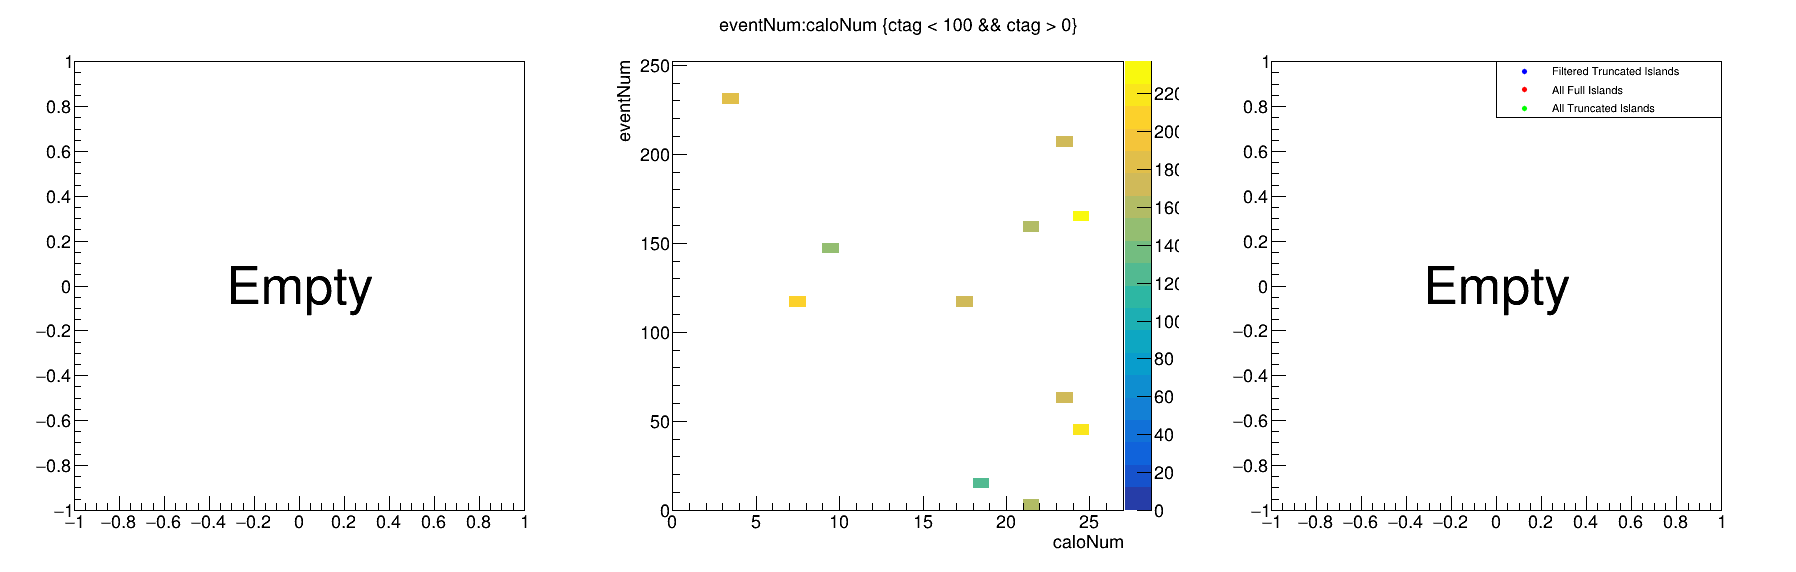

In [9]:
c = r.TCanvas("c","c",1800,600)
drawStr = "eventNum:caloNum"
filterStr = "ctag < 100 && ctag > 0"
fmtString = "colz"
#filterStr = ""
c.Divide(3)
c.cd(1)
n1 = t_filter.Draw(drawStr,filterStr,fmtString)
c.cd(2)
n2 = t_full.Draw(drawStr,filterStr,fmtString)
c.cd(3)
n3 = t_trunc.Draw(drawStr,filterStr,fmtString)

leg = r.TLegend(0.5,0.8,0.9,0.9)
leg.AddEntry(t_filter,"Filtered Truncated Islands","p")
leg.AddEntry(t_full,"All Full Islands","p")
leg.AddEntry(t_trunc,"All Truncated Islands","p")
leg.Draw()

c.Draw()

print(n1, n2, n3)
if(n3 > 0):
    print(n1/n3)
    print(n2/n3)
print(1/7.,1/9.,1/11.)

In [10]:
n2event = t_full.Draw("eventNum",filterStr)
ctagHists = list(set([t_full.GetV1()[i] for i in range(n2event)]))

filterStr = filterStr + " && ( "
for i, ei in enumerate(ctagHists):
    filterStr += "eventNum == "+str(int(ei))+"  || "
filterStr = filterStr[:-3]+" )"
print(filterStr)

ctag < 100 && ctag > 0 && ( eventNum == 2  || eventNum == 162  || eventNum == 230  || eventNum == 42  || eventNum == 14  || eventNum == 144  || eventNum == 208  || eventNum == 116  || eventNum == 60  || eventNum == 158   )


0 1967 0
0.14285714285714285 0.1111111111111111 0.09090909090909091


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


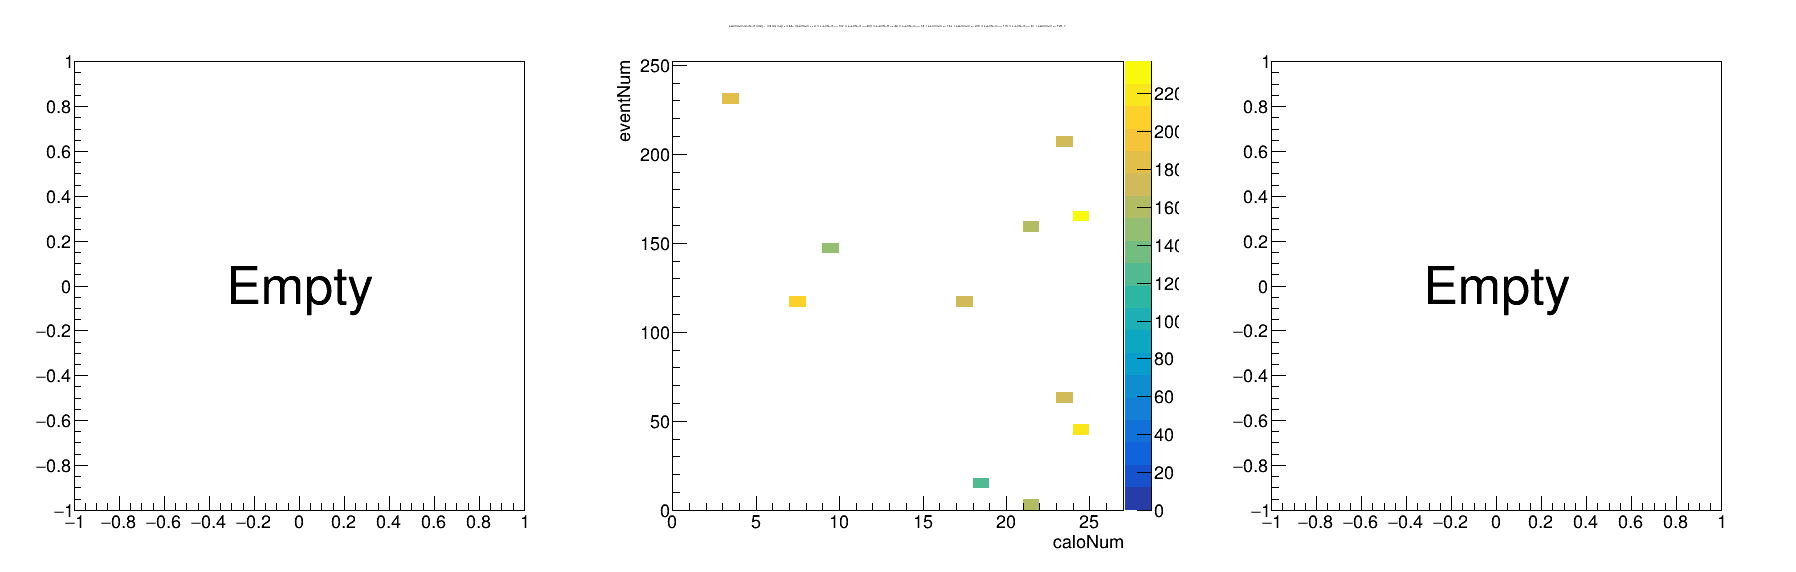

In [11]:
c = r.TCanvas("c","c",1800,600)
c.Divide(3)
c.cd(1)
n1 = t_filter.Draw(drawStr,filterStr,fmtString)
c.cd(2)
n2 = t_full.Draw(drawStr,filterStr,fmtString)
c.cd(3)
n3 = t_trunc.Draw(drawStr,filterStr,fmtString)
c.Draw()

print(n1, n2, n3)
if(n3 > 0):
    print(n1/n3)
    print(n2/n3)
print(1/7.,1/9.,1/11.)

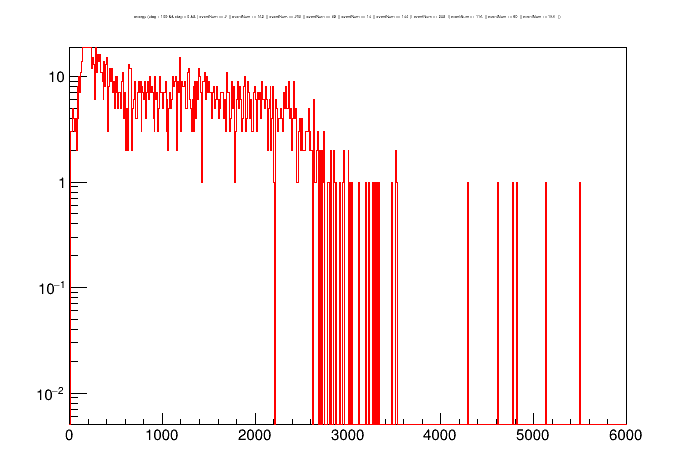

In [12]:
c = r.TCanvas()
n1 = t_filter.Draw("energy>>hist(600,0,6000)",filterStr,"")
n2 = t_full.Draw("energy",filterStr,"same")
c.SetLogy()
c.Draw()

Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


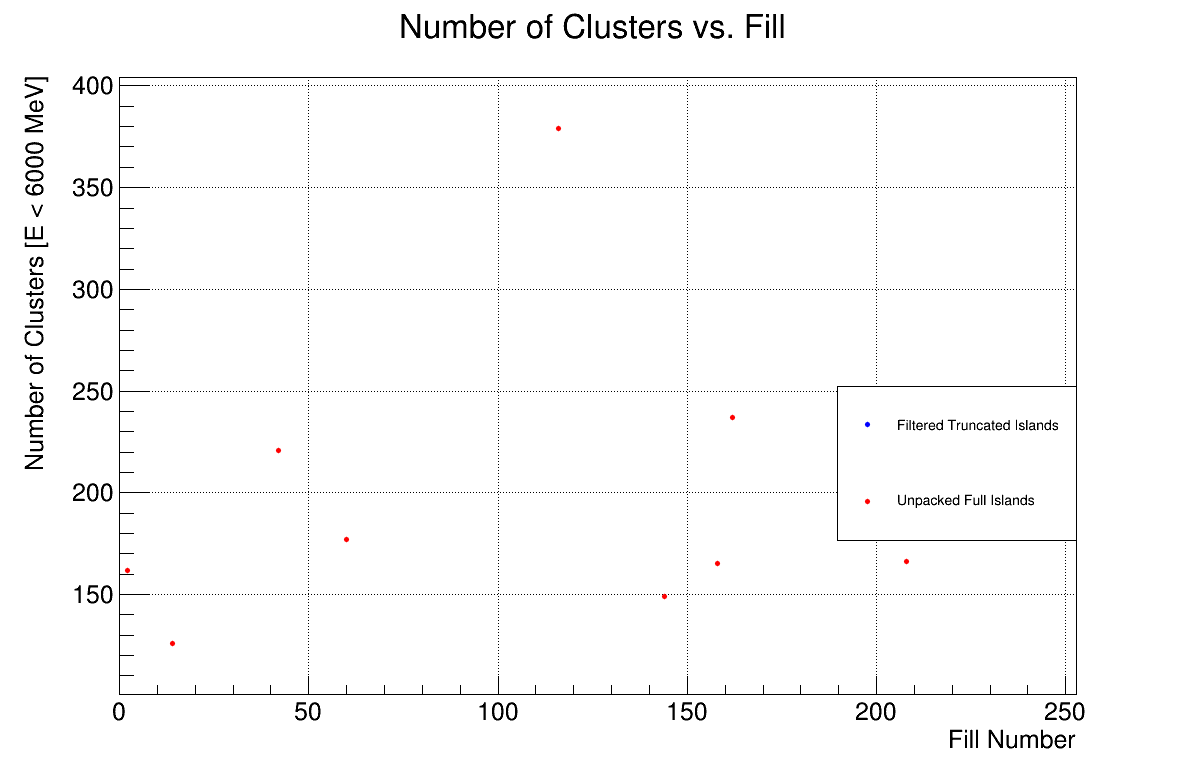

In [13]:
c = r.TCanvas("c","c",1200,800)

n1 = t_filter.Draw("@energy.size():eventNum",filterStr,"goff")
gr = r.TGraph(n1, t_filter.GetV2(), t_filter.GetV1())
gr.SetTitle("Number of Clusters vs. Fill; Fill Number; Number of Clusters")
gr.SetMarkerColor(4)
gr.SetMarkerStyle(8)
gr.SetMarkerSize(0.5)

n2 = t_full.Draw("@energy.size():eventNum",filterStr,"goff")
gr2 = r.TGraph(n2, t_full.GetV2(), t_full.GetV1())
gr2.SetTitle("Number of Clusters vs. Fill; Fill Number; Number of Clusters [E < 6000 MeV]")
gr2.SetMarkerColor(2)
gr2.SetMarkerStyle(8)
gr2.SetMarkerSize(0.5)

gr2.Draw("ap")
gr.Draw("SAME p")

leg = r.TLegend(0.7,0.3,0.9,0.5)
leg.AddEntry(gr,"Filtered Truncated Islands","p")
leg.AddEntry(gr2,"Unpacked Full Islands","p")
leg.Draw()

c.SetGrid()
#c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TGraphPainter::PaintGraph>: illegal number of points (0)


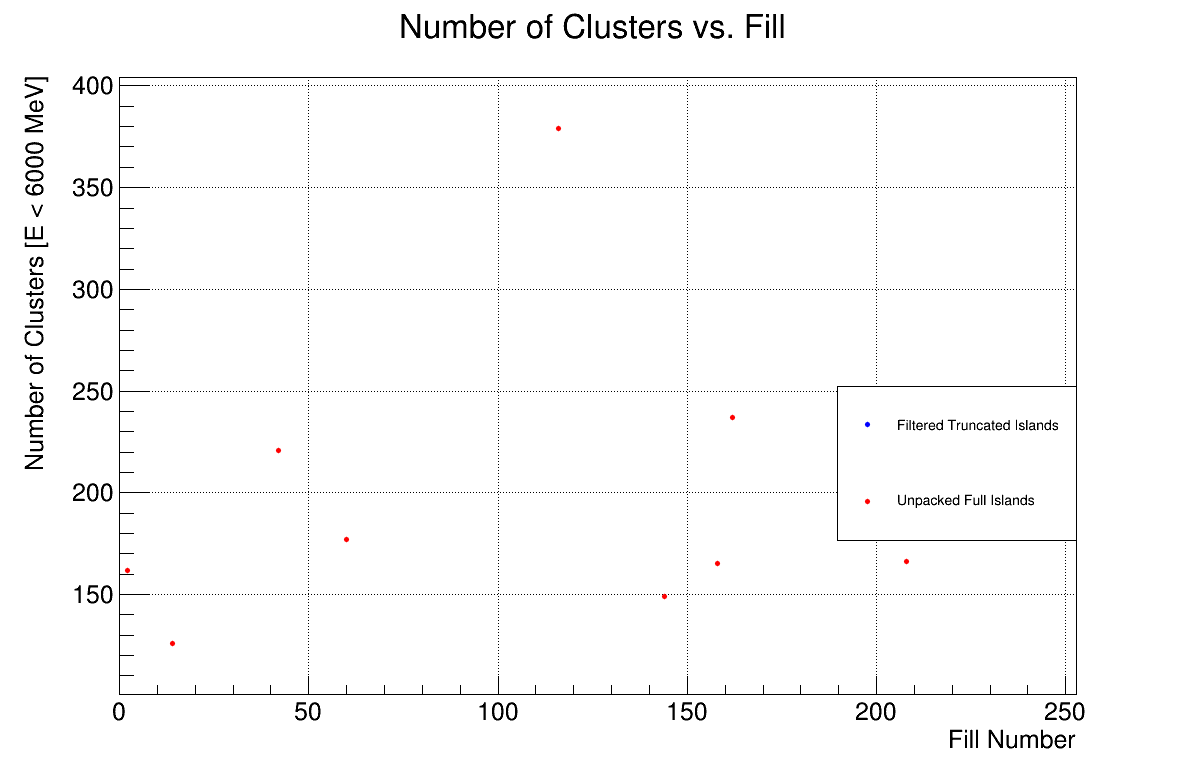

In [14]:
c = r.TCanvas("c","c",1200,800)

n1 = t_filter.Draw("@energy.size():eventNum",filterStr,"goff")
gr = r.TGraph(n1, t_filter.GetV2(), t_filter.GetV1())
gr.SetTitle("Number of Clusters vs. Fill; Fill Number; Number of Clusters")
gr.SetMarkerColor(4)
gr.SetMarkerStyle(8)
gr.SetMarkerSize(0.5)

n2 = t_full.Draw("@energy.size():eventNum",filterStr,"goff")
gr2 = r.TGraph(n2, t_full.GetV2(), t_full.GetV1())
gr2.SetTitle("Number of Clusters vs. Fill; Fill Number; Number of Clusters [E < 6000 MeV]")
gr2.SetMarkerColor(2)
gr2.SetMarkerStyle(8)
gr2.SetMarkerSize(0.5)

gr2.Draw("ap")
gr.Draw("SAME p")

leg = r.TLegend(0.7,0.3,0.9,0.5)
leg.AddEntry(gr,"Filtered Truncated Islands","p")
leg.AddEntry(gr2,"Unpacked Full Islands","p")
leg.Draw()

c.SetGrid()
#c.SetLogy()
c.Draw()

---

### Lets make sure that this calo isn't exactly identical to any others

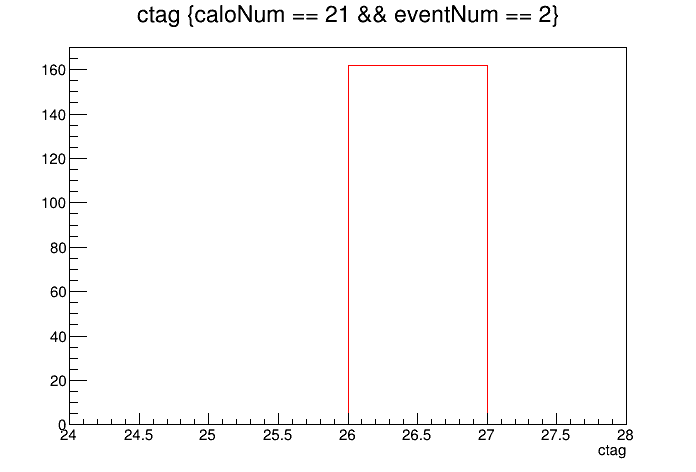

In [15]:
calo = 21
fill = 2

cutStr = "caloNum == "+str(calo)+" && eventNum == "+str(fill)

c = r.TCanvas()
t_full.Draw("ctag",cutStr,"")
c.Draw()

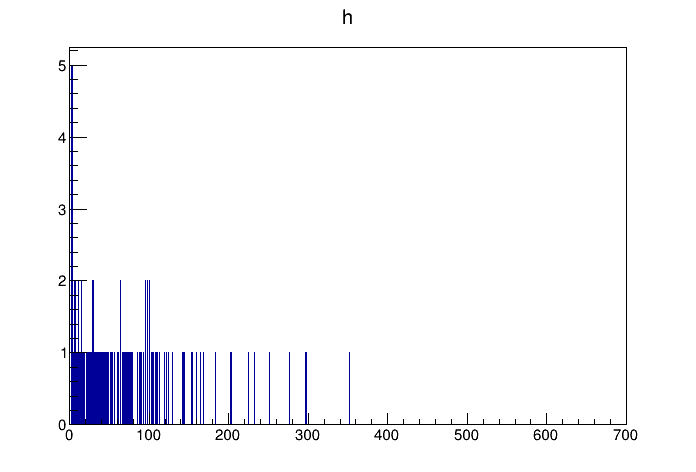

In [16]:
#h = r.TH1D("h","h",6000,0,6000)
#t_full.Draw("energy>>h",cutStr,"goff")
h = r.TH1D("h","h",4700,0,700)
t_full.Draw("time/1000*1.25>>h",cutStr,"goff")
c = r.TCanvas()
h.Draw()
c.Draw()

In [22]:
matchingHists = []
for filli in range(300):
    #if(filli > 0):
    #    break
    for caloi in range(1,24):
        cutStri = "caloNum == "+str(caloi)+" && eventNum == "+str(filli)
        
        hi = r.TH1D("hi","hi",4700,0,700)
        t_full.Draw("time/1000*1.25>>hi",cutStri,"goff")
        
        #hi = r.TH1D("hi","hi",6000,0,6000)
        #t_full.Draw("energy>>hi",cutStri,"goff")
        hi.Add(h, -1)
        if(hi.Integral() == 0):
            print(filli, caloi, hi.Integral(), hi.GetMaximum(), hi.GetMinimum())
            matchingHists.append([filli, caloi])
        hi.Delete()

2 21 0.0 0.0 0.0
24 13 0.0 4.0 -4.0
148 19 0.0 3.0 -3.0
228 15 0.0 4.0 -4.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


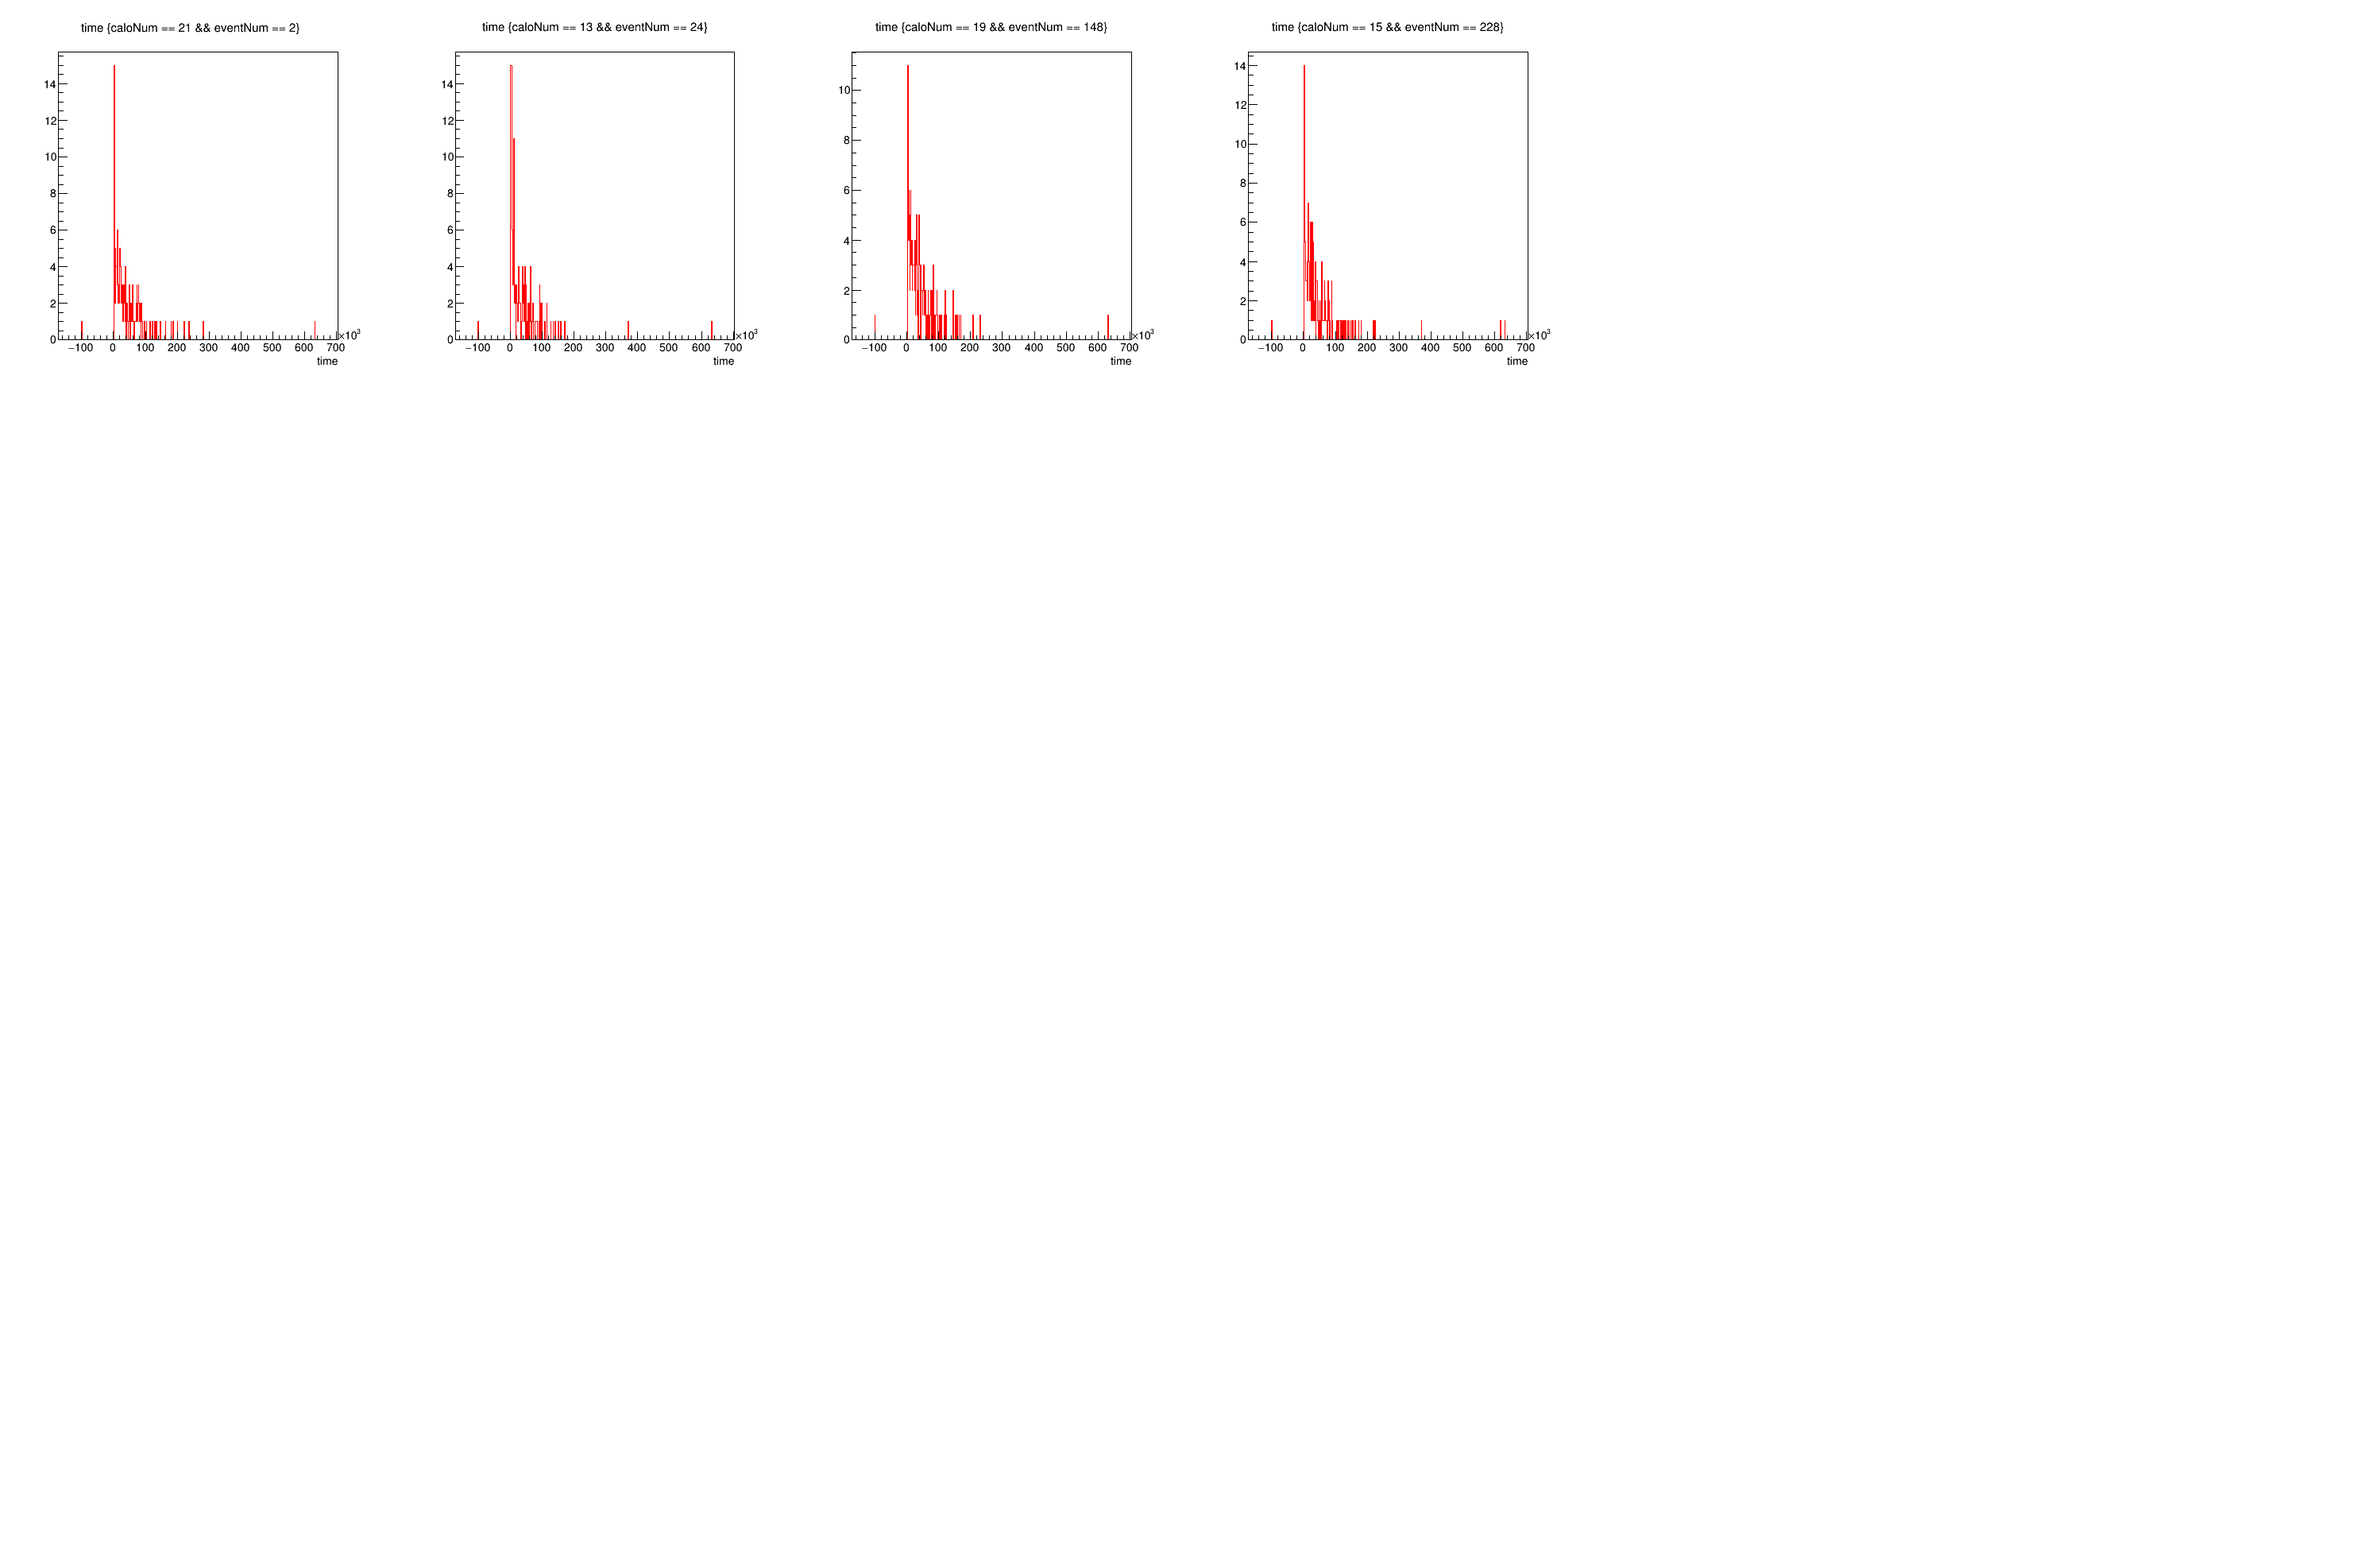

In [23]:
c = r.TCanvas("c","c",3000,2000)
c.Divide(6,4)
for i, (filli,caloi) in enumerate(matchingHists):
    c.cd(i+1)
    cutStri = "caloNum == "+str(caloi)+" && eventNum == "+str(filli)
    t_full.Draw("time",cutStri,"")
c.Draw()